In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [8]:
# load dataset
iris=datasets.load_iris()

In [9]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

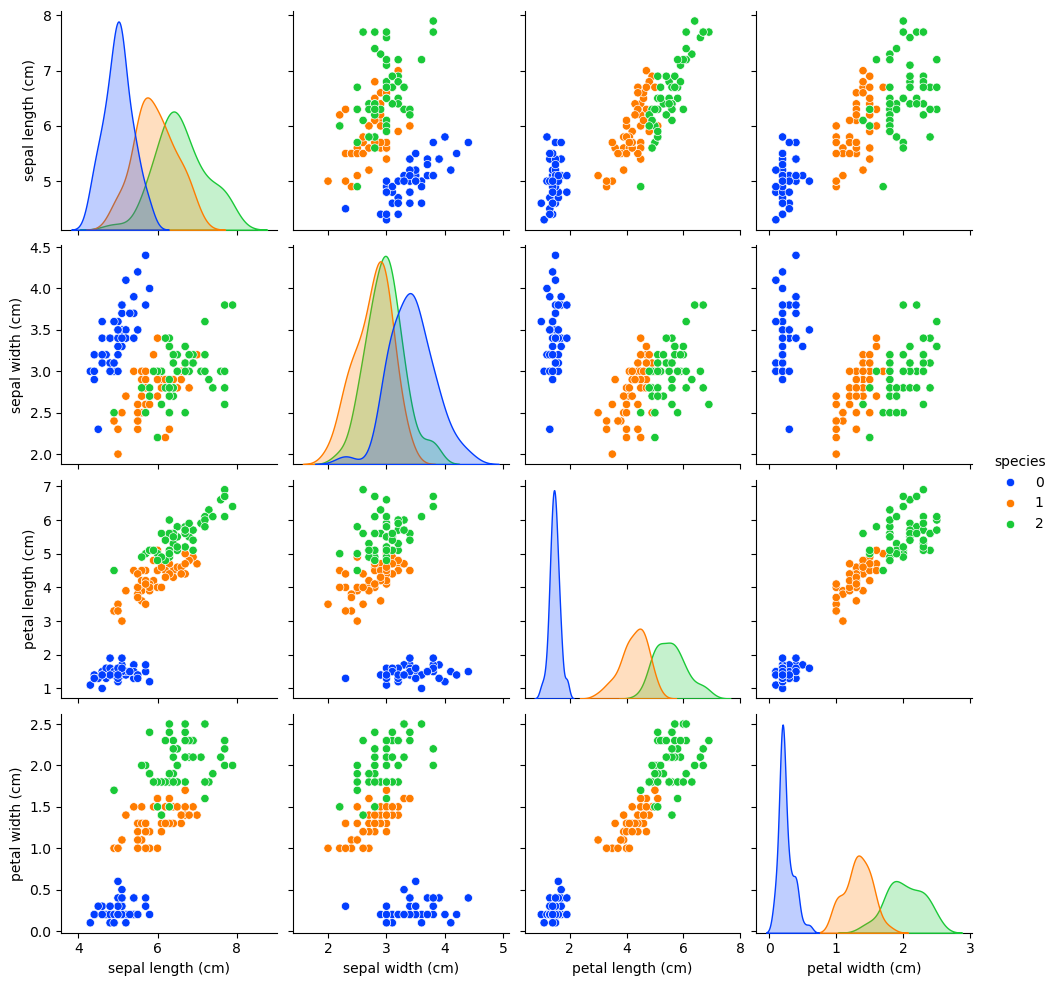

In [14]:
sns.pairplot(df,hue='species',palette='bright');

In [15]:
x=iris.data
y=iris.target

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
x_train=scaler.fit_transform(x_train)

In [20]:
x_test=scaler.transform(x_test)

In [21]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [23]:
train_accuracy=accuracy_score(y_train,y_train_pred)


In [24]:
train_accuracy

0.9916666666666667

In [25]:
test_accuracy=accuracy_score(y_test,y_test_pred)

In [26]:
test_accuracy

0.9

In [27]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.75      0.86        12
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



In [28]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      0.97      0.99        38
           2       0.98      1.00      0.99        41

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [29]:
import pickle

In [30]:
pickle.dump(model,open('svc_iris_model.pkl','wb'))
pickle.dump(scaler,open('svc_iris_scaler.pkl','wb'))


In [31]:
sv_model=pickle.load(open('svc_iris_model.pkl','rb'))

In [32]:
sv_scaler=pickle.load(open('svc_iris_scaler.pkl','rb'))

In [33]:
input_data=np.array([[6.7,3.0,5.2,2.3]])


In [34]:
std_data=sv_scaler.transform(input_data)

In [35]:
species=sv_model.predict(std_data)

In [36]:
print(species[0])

2


# NAIVE BAYES

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [74]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [76]:
train_accuracy=accuracy_score(y_train,y_train_pred)
print(train_accuracy)

0.95


In [78]:
test_accuracy=accuracy_score(y_test,y_test_pred)
print(test_accuracy)

0.9333333333333333


In [80]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



In [82]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.92      0.92      0.92        38
           2       0.93      0.93      0.93        41

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

